In [1]:
import operator
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
  
boston_dataset = fetch_california_housing() 
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [2]:
boston['MEDV'] = boston_dataset.target
boston.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
print(boston.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64


C:\Users\mahal\AppData\Local\Temp\ipykernel_17080\2869092095.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston['MEDV'], bins=30)


<Axes: xlabel='MEDV', ylabel='Density'>

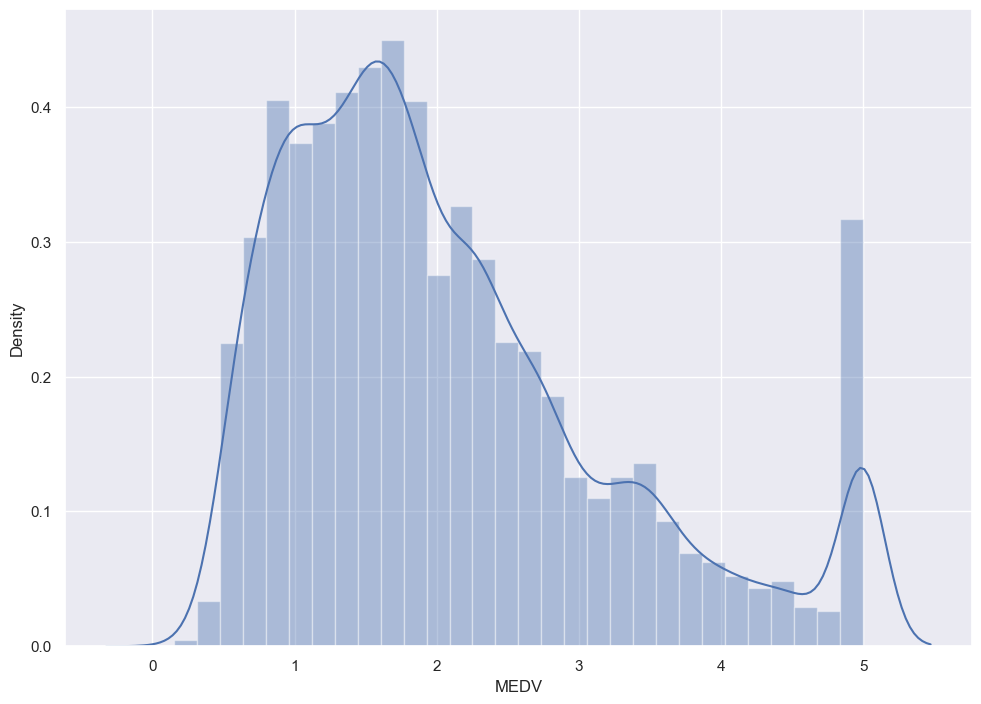

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)

<Axes: >

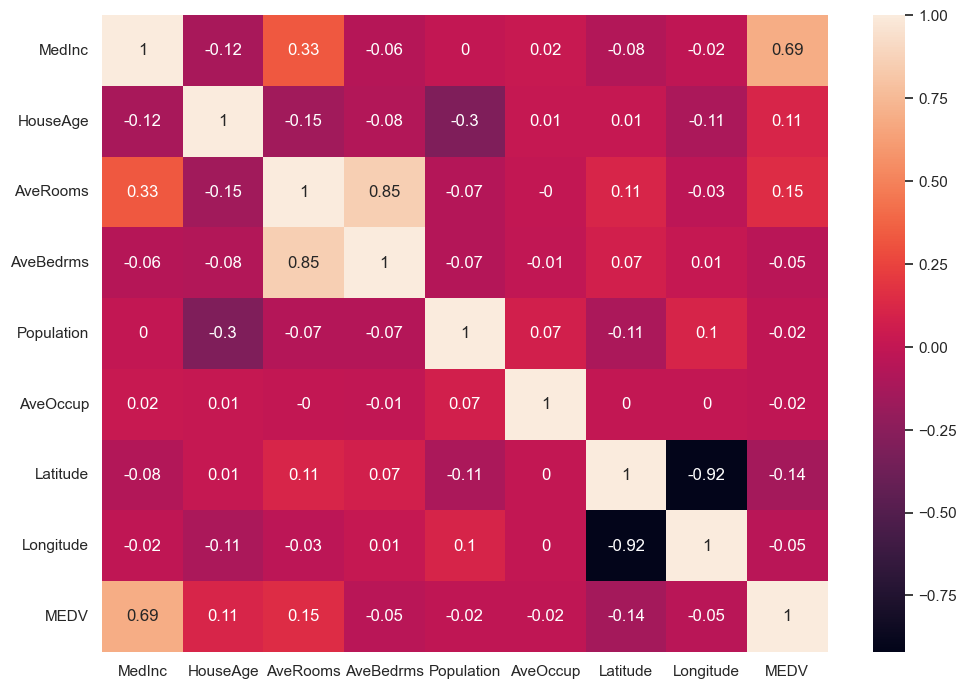

In [5]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

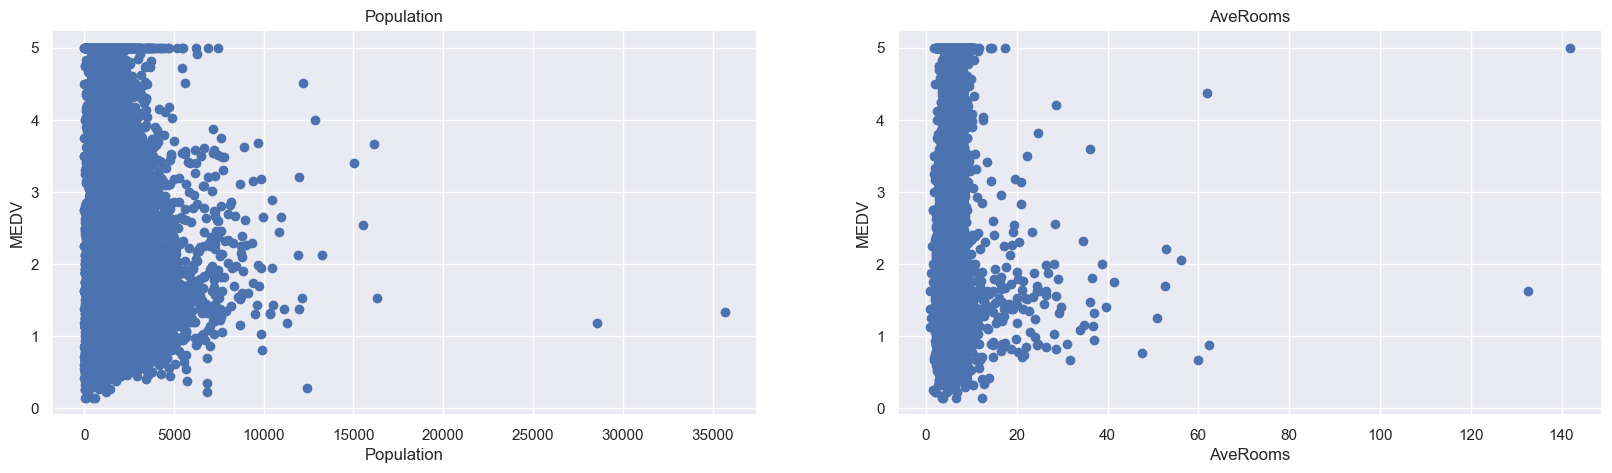

In [6]:
plt.figure(figsize=(20, 5))

# We'll only use LSTAT and RM for our purpose
features = ['Population', 'AveRooms']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [7]:
dataset = pd.DataFrame(np.c_[boston['Latitude'], boston['AveRooms'], boston['MEDV']], columns=features+['MEDV'])
dataset.head()

,Population,AveRooms,MEDV
0,37.88,6.984127,4.526
1,37.86,6.238137,3.585
2,37.85,8.288136,3.521
3,37.85,5.817352,3.413
4,37.85,6.281853,3.422


In [8]:
train_set = dataset.sample(frac=0.7, random_state=200)
test_set = dataset.drop(train_set.index)
train_set = train_set.to_numpy()
test_set = test_set.to_numpy()
print(len(train_set))
print(len(test_set))

14448
6192


In [9]:
print(train_set[0])
print(test_set[0])

[38.51        5.70783848  1.469     ]
[37.88        6.98412698  4.526     ]


Model Building

Euclidean Distance

In [10]:
# numpy implementation


def euclideanDistance(instance1, instance2):
    return np.round(np.linalg.norm(instance1[:-1] - instance2[:-1]), 3)
# import math
#
#
# def euclideanDistance(instance1, instance2, length):
#     distance = 0
#     for x in range(length):
#         distance += pow((instance1[x] - instance2[x]), 2)
#     return math.sqrt(distance)
# test euclidean distance

data1 = train_set[0]
data2 = train_set[23]
print(data1, data2)
distance = euclideanDistance(data1, data2)
print('Distance: ' + repr(distance))

[38.51        5.70783848  1.469     ] [33.71        6.81617647  3.065     ]
Distance: 4.926


Get K-Neighbours

In [11]:
def getKNeighbors(trainingSet, testInstance, k):
    distances = []
    for i in trainingSet:
        dist = euclideanDistance(i, testInstance)
        distances.append((i, dist))

    distances.sort(key=operator.itemgetter(1))

    neighbors = []
    for x in range(k):
        neighbors.append(distances[x])
    return neighbors
# test getKNeighbors

test_instance = test_set[20]
print(f'Test Instance: {test_instance}')
k = 3
neighbors = getKNeighbors(test_set, test_instance, k)
print(f'Closest {k} neigbors:{neighbors}')

Test Instance: [37.81        5.55263158  0.75      ]
Closest 3 neigbors:[(array([37.81      ,  5.55263158,  0.75      ]), 0.0), (array([37.8       ,  5.59215686,  5.00001   ]), 0.041), (array([37.86      ,  5.55817378,  2.895     ]), 0.05)]


Get Response

In [12]:
def getResponse(neighbors, k):
    average = 0
    for i in range(k):
        average += neighbors[i][0][-1]
    return round(average / k, 1) # divided by the number of points    
# test getResponse
# point 1 = [31.99, 5., 7.4]
# 7.4 -> output at point 1
# 2.284 -> distance to point 1
neighbors = [([31.99,  5.,  7.4], 2.284), ([30.81,  5.277,  7.2],
                                           2.317), ([20.32,  6.343,  7.2],  2.3176)]

print(neighbors[0][-1])
print(neighbors[0][0][-1])
print()
print(getResponse(neighbors, 3))

2.284
7.4

7.3
